# Credit Score Classification task

A credit score tells lenders about your creditworthiness. Companies use credit scores to make decisions on whether to offer you a mortgage, credit card, auto loan, and other credit products. With fast incresing in using Machine Learning and Deep Learning for most of our aspect of lives, banks and credit card companies are not out of these trends. They use Machine learning algorithms to classify their customers's credit card score into different levels based on their customers's historical data. 

In this project, I build a classifier to classify credit score into three different labels (Good, Standard, Poor) using Machine Learning models and Python.
Data used in this project is based on the credit score classification submitted by Rohan Paris on Kaggle: https://www.kaggle.com/parisrohan


## Variables:
- ID: Unique ID of the record
- Customer_ID: Unique ID of the customer
- Month: Month of the year
- Name: The name of the person
- Age: The age of the person
- SSN: Social Security Number of the person
- Occupation: The occupation of the person
- Annual_Income: The Annual Income of the person
- Monthly_Inhand_Salary: Monthly in-hand salary of the person
- Num_Bank_Accounts: The number of bank accounts of the person
- Num_Credit_Card: Number of credit cards the person is having
- Interest_Rate: The interest rate on the credit card of the person
- Num_of_Loan: The number of loans taken by the person from the bank
- Type_of_Loan: The types of loans taken by the person from the bank
- Delay_from_due_date: The average number of days delayed by the person from the date of payment
- Num_of_Delayed_Payment: Number of payments delayed by the person
- Changed_Credit_Card: The percentage change in the credit card limit of the person
- Num_Credit_Inquiries: The number of credit card inquiries by the person
- Credit_Mix: Classification of Credit Mix of the customer
- Outstanding_Debt: The outstanding balance of the person
- Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
- Credit_History_Age: The age of the credit history of the person
- Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
- Total_EMI_per_month: The total EMI per month of the person
- Amount_invested_monthly: The monthly amount invested by the person
- Payment_Behaviour: The payment behaviour of the person
- Monthly_Balance: The monthly balance left in the account of the person
- Credit_Score: The credit score of the person

## Import libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

## Load data

In [2]:
data = pd.read_csv("train.csv")
data.head(5)


ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

## Data Exploration/Visualization

Take a first look at the data. There are total 100000 observations and 28 features including the targer variable, which is Credit_Score in last column. 

In [3]:
print(data.shape)
print(data.info())


(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000

In [4]:
print(data['Credit_Score'].value_counts())

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


Next, we should check if there is any missing values in the data. We can see that there is no null value in the dataset. 

In [5]:
print(data.isna().sum().sum())


0


There are many features that can contribute to train the model to classify credit score. We can see from the columns below that the first five columns (ID, Customer_ID, Month, Name, SSN) that are identification columns. These will not contribute in training the model so they will be left out. Let's examine the other variables one by one.


In [ ]:
print(data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


I will plot the 'Age' feature to see if people in different age groups have different Credit score

Text(0.5, 1.0, 'Age with Credit score')

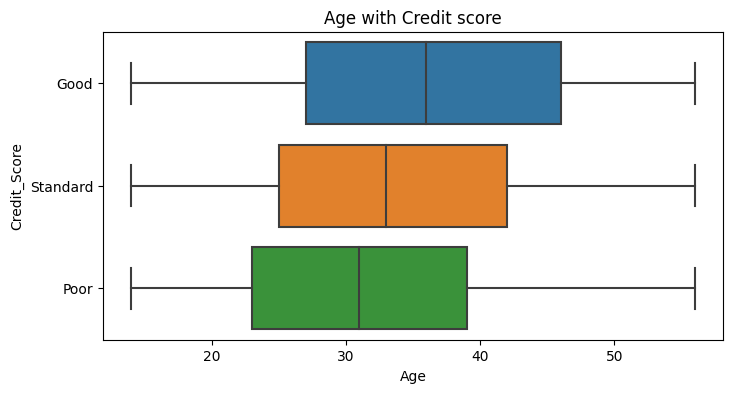

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Age', y = 'Credit_Score')
plt.title("Age with Credit score")

We can see from the plot above that older people  tend to have good credit score compare to younger people.

Next, we'll examine the Occupation feature to see if people with different occupations has different credit score or not.



In [ ]:
#mosaic(data, ['Occupation', 'Credit_Score'])
import plotly.express as px

fig = px.box(data, x="Occupation", y="Credit_Score", title = " Credit Score Based on Occupation")
fig.show()

We can see from the plot above that there aren't much difference of credit ccore from all occupation. We will leave this variable out in our training. 

Next, we will explore the Annual income feature if it impacts people credit score or not. 

Text(0.5, 1.0, 'Credit Score Based on Annual_Income')

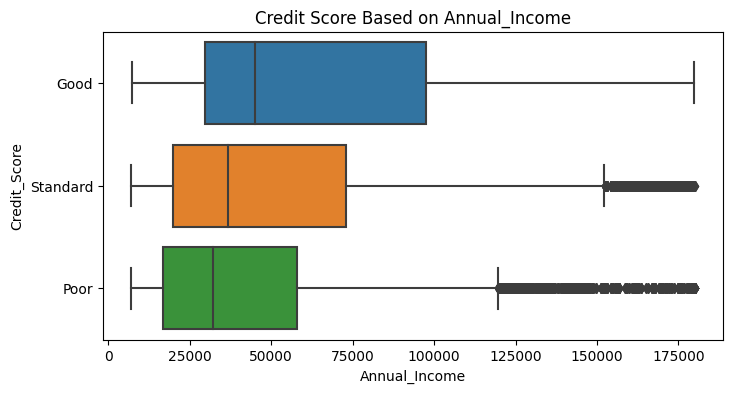

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Annual_Income', y = 'Credit_Score')
plt.title("Credit Score Based on Annual_Income")

From the plot above, people with higher annual income tend to have better credit score.

Next we will explore monthly inhand salary to see if it play an important role in building credit score.

Text(0.5, 1.0, 'Credit Score Based on Monthly_Inhand_Salary')

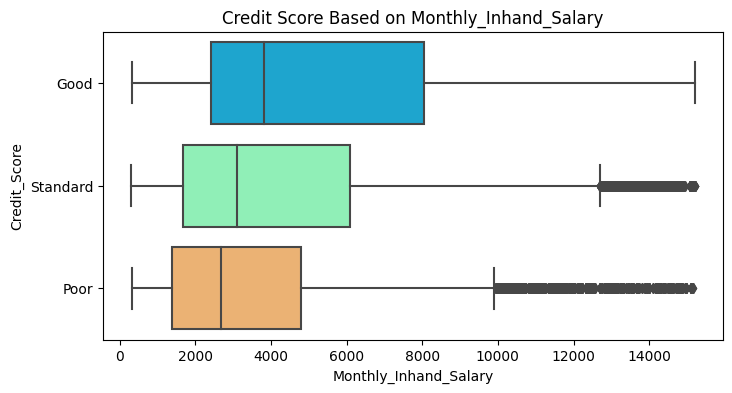

In [ ]:

plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Monthly_Inhand_Salary', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Monthly_Inhand_Salary")

We can see that the more monthly inhand salary people earn, the better their credit score they have. 

Next we'll examine the impacts of number of bank acounts, number of credit cards and number of loans on credit score. 


[Text(0, 0.5, '')]

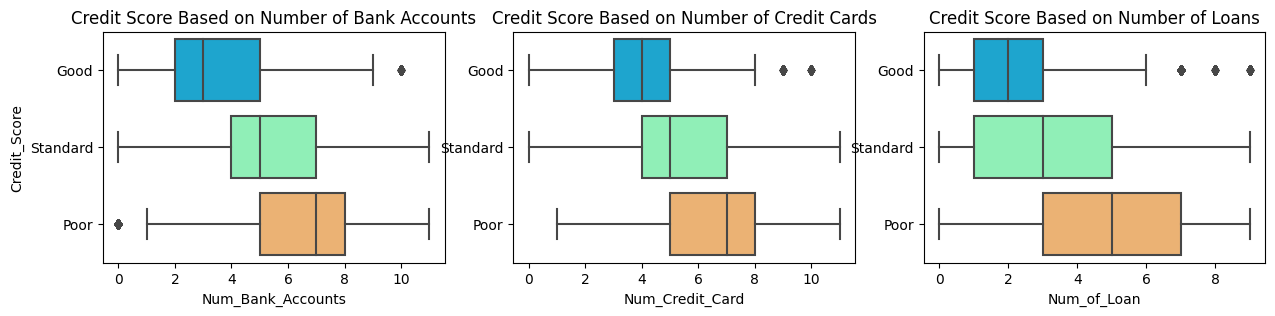

In [ ]:
from matplotlib.axes import Axes
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.boxplot(ax = axes[0], x = data['Num_Bank_Accounts'], y = data['Credit_Score'], palette='rainbow')
axes[0].set_title("Credit Score Based on Number of Bank Accounts")
sns.boxplot(ax = axes[1], x = data['Num_Credit_Card'], y = data['Credit_Score'], palette='rainbow')
axes[1].set_title("Credit Score Based on Number of Credit Cards")
axes[1].set(ylabel = None)
sns.boxplot(ax = axes[2], x = data['Num_of_Loan'], y = data['Credit_Score'], palette='rainbow')
axes[2].set_title("Credit Score Based on Number of Loans")
axes[2].set(ylabel = None)

Number of bank acounts, number of credit cards  and number of loans all play almost similar role in credit score. People with more than five bank accounts or more than five credit cards tend to have poor credit score. Good credit score come from people with 2 to 5 bank accounts and 3 to 5 credit cards. Beside that, people with 1 to 3 loans have good credit score while 3 to 7 loans is bad for credit score.

Next we investigate whether interest rate feature impacts someone credit score or not. 

Text(0.5, 1.0, 'Credit Score Based on Average Interest rate')

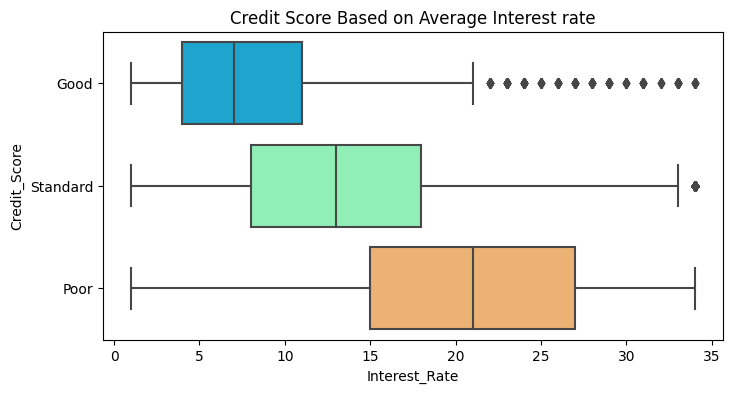

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Interest_Rate', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Average Interest rate")

People have very high interest rate, above 15%, have poor credit score. Average interest rate from 4 - 11% is good for credit score.

Next let's plot Delay_from_due_date feature vs credit score.


Text(0.5, 1.0, 'Credit Score Based on Average Number of Days Delay from Due Date')

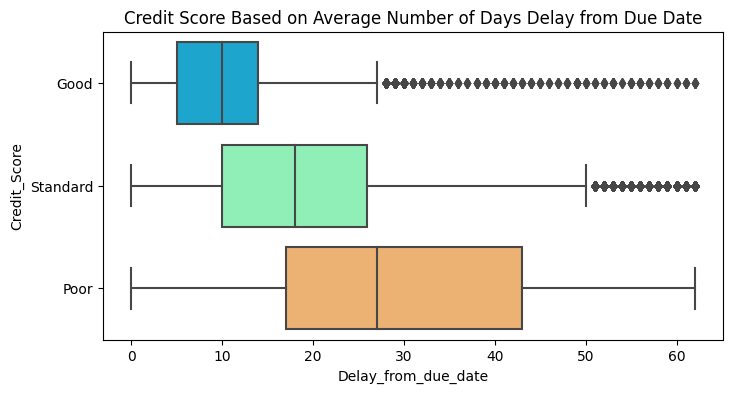

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Delay_from_due_date', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Average Number of Days Delay from Due Date")

People can delay their payment from 5 to 15 days from the due date. Delaying payment 17 days from due date will negatively impact your credit score. 

Next let's check if number of delay payments will impact people credit score or not.


Text(0.5, 1.0, 'Credit Score Based on Number of Delay Payment')

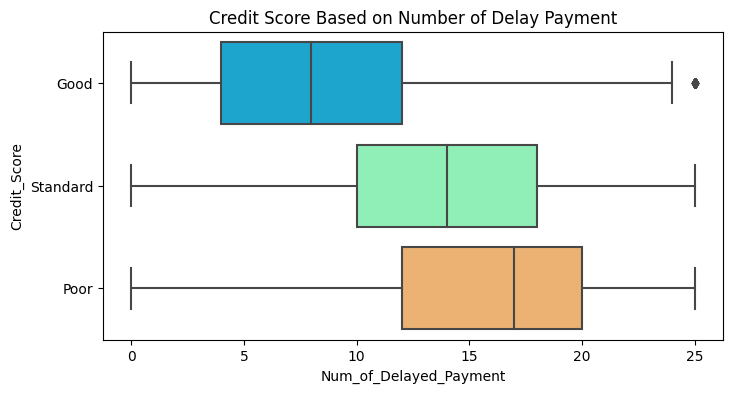

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Num_of_Delayed_Payment', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Number of Delay Payment")

People with more than 12 delay payments from due date will have Poor credit score compare to people with Good credit score. 



Text(0.5, 1.0, 'Credit Score Based on Percentage Change in the Credit Card Limit')

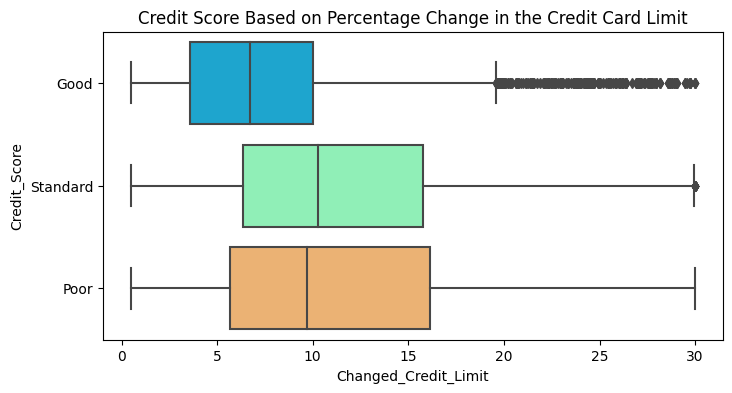

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Changed_Credit_Limit', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Percentage Change in the Credit Card Limit")

The plot doesn't show clearly how this variable have an affect on Credit Score. Eventhough it shows that people with good credit score have smaller percentage change in ther credit limit, but for Standard and Poor Credit Score, the percentage change in credit limit are the same. We need to investigate more about this variable to see if it has interaction effects with other variables. 

Next let's take a look at Credit_Mix variable. From the plot below, we see that this variable have 

In [ ]:
fig = px.box(data, x="Credit_Mix", y="Credit_Score", title = " Credit Score Based on Credit Mix")
fig.show()

This variable has strong correlation to our target variables.

Text(0.5, 1.0, 'Credit Score Based on The Outstanding Balance')

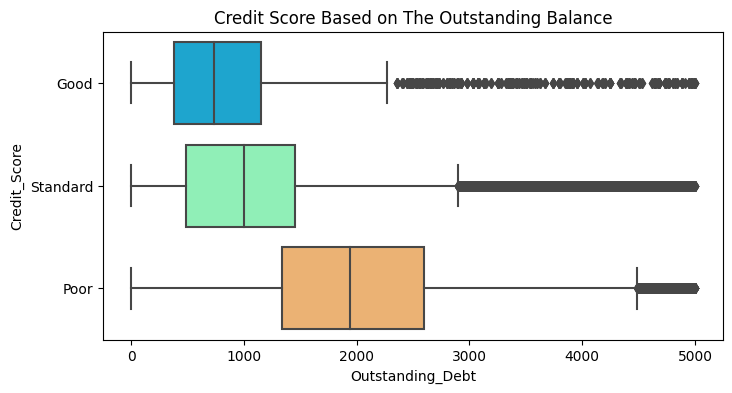

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Outstanding_Debt', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on The Outstanding Balance")

Having an outstanding balance with more than   1300 dollards will negatively affect your credit score. An outstanding debt around 400 to 1200 dollards will not affect your credit score.

Next let's take a look at credit utilization ratio varialbe. We can think of credit utilization ratio or credit utilization rate as simple as how much you currently own divided by your credit limit.

Text(0.5, 1.0, 'Credit Score Based on The Credit Utilization Ratio')

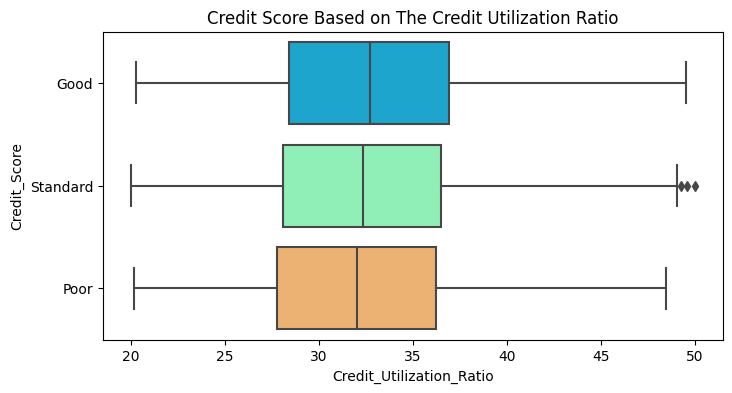

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Credit_Utilization_Ratio', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on The Credit Utilization Ratio")

We see that there are not much difference from the effects of this variable on credit score.

Next let's take a look at credit history age variable.

Text(0.5, 1.0, 'Credit Score Based on Credit History Age')

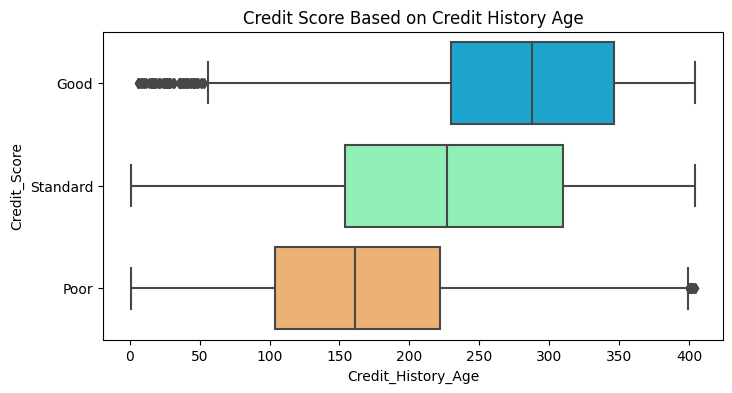

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Credit_History_Age', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Credit History Age")

The plot above clearly shows us that the longer credit history the better credit score. 

Next let's see if total EMI per month will affect credit score.

Text(0.5, 1.0, 'Credit Score Based on Total Number of EMI per Month')

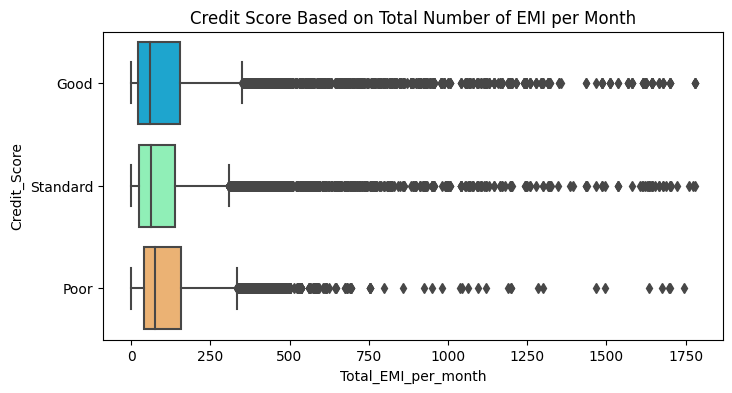

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Total_EMI_per_month', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Total Number of EMI per Month")

The total number of EMI per month doesn't have any effect on credit score. We will leave this variable out in our training data. Next let's examine if the amount invested monthly will impact credit score.

Text(0.5, 1.0, 'Credit Score Based on Monthly Amount Invested')

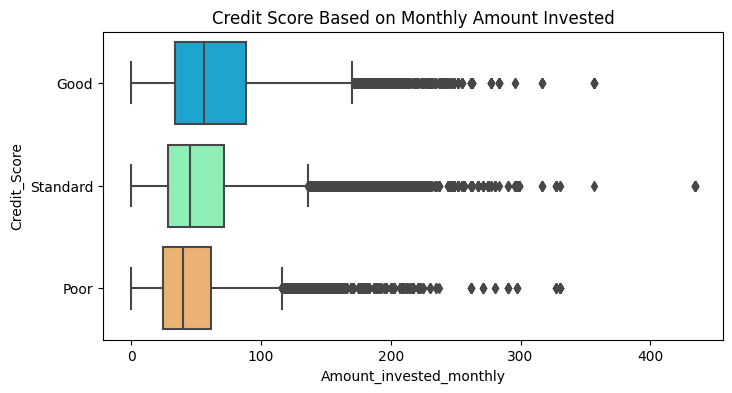

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Amount_invested_monthly', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Monthly Amount Invested")

We can see that the amount invested monthly doesn't impact on credit score alot. 



Text(0.5, 1.0, 'Credit Score Based on Monthly Balance')

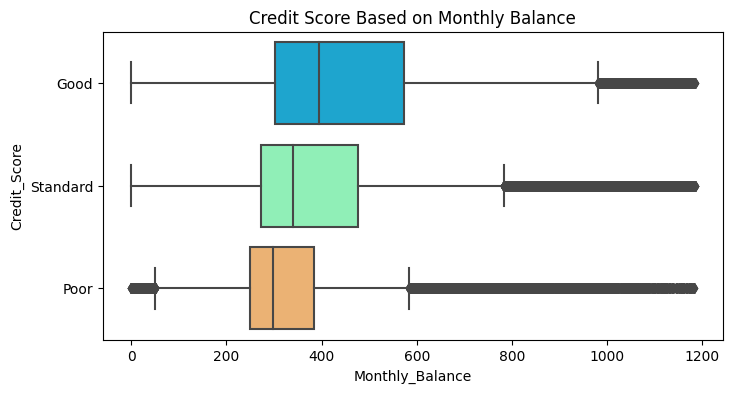

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = data, x = 'Monthly_Balance', y = 'Credit_Score', palette='rainbow')
plt.title("Credit Score Based on Monthly Balance")

The more balance is in the account, the better the credit score. Having balance less thant 250 dollards at the end of month will have negatively impact on your credit score.

## Preprocess Data

After exploring the data and variables, we'll use the variables that have impact on Credit score to train the classification model. 

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split

In [6]:
data1 = data.copy()
X1 = data1[["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", 
                 "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",  "Delay_from_due_date",
                 "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", 
                    "Credit_History_Age", "Monthly_Balance"]]

y1 = np.array(data1[["Credit_Score"]])


First of all, we need to split our dataset into train set and test set.

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 1121218)

There are both categorical and numeric features. We will build two separate pipelines and combine them later. 
We can see from the description of the data below that there are wide range in value of some variables such as Annual_Income, Monthly_Inhand_Salary, Outstanding_Debt, Monthly_Balance. I will use two methods for feature scaling, normalization and standardization, to unify these features. 

In [8]:

score = ["Bad", "Standard", "Good"]
cat_pipeline = Pipeline(
    steps= [('label_encoder',  OrdinalEncoder(categories = [score]))])
num_pipeline =  Pipeline(
    steps= [('scale', StandardScaler())])

Finally, we will combine the two pipelines with a column transformer. First, we need to specify which columns the pipelines are designed for, so we isolate the categorical and numeric feature names:

In [10]:
cat_cols = X1.select_dtypes(exclude="number").columns
num_cols = X1.select_dtypes(include="number").columns
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
       'Credit_History_Age', 'Monthly_Balance'],
      dtype='object')

Next, we will input these along with their corresponding pipelines into a ColumnTransFormer instance


In [11]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(
    transformers=[
        ("numeric", num_pipeline, num_cols),
        ("categorical", cat_pipeline, cat_cols)])

## Model Selection


I will use ensample techniques, combinations of different classifiers that create a more robust model, include Random Forest and XGBoost. These models has been very popular using by many projects on Kaggle and been proving provide good result on the classification problems with structure dataset. 
- Randomforest: is a bagging ensamble that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
- XGBoost: is a boosting ensamble method that improve the the flexibility of simple models by running a series of constrained learners in sequence. Each following one will learn from the mistakes of the previous one. 


In [12]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In this step we combine the Pipeline from ColumnTransformer with the Randomforest model and Xgboost model. For now, we just run the model with default parameters. 
First we use Randomforest and check f1 score.

In [125]:
rf_cf = RandomForestClassifier()
clf_pipeline = Pipeline(steps=[('preprocessor', col_trans),
                      ('classifier', rf_cf)])
clf_pipeline.fit(X1_train, y1_train)
y_pred = clf_pipeline.predict(X1_test)
f1_score = metrics.f1_score(y1_test, y_pred, average = 'micro')
print(f"Model f1_score: {f1_score}")


Model f1_score: 0.81072


The F1 score of the model from scaled data is 0.8018. Now let's compare with the result of the model training with data that's not scale.

Next we model the data with only encode the categorical feature, we keep the numerical features as orginal forms.

There's one categorical variable, Credit_Mix. Since Credit_Mix has natural ordering (Good, Standard, Bad), I'll use label encoding to transform it into numerical in order to use it in training the model.

In [173]:
data2 = data.copy()
data2["Credit_Mix"] = data2["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})
X2 = data2[["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", 
                 "Num_Credit_Card", "Interest_Rate", "Num_of_Loan",  "Delay_from_due_date",
                 "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", 
                    "Credit_History_Age", "Monthly_Balance"]]

#y2 = np.array(data2[["Credit_Score"]])

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 450)


Let's train the Randomforest model with our orginial data

In [174]:

rf_cf = RandomForestClassifier(n_estimators = 100)
rf_cf.fit(X2_train, y2_train.ravel())
y_pred = rf_cf.predict(X2_test)
f1_score = metrics.f1_score(y2_test, y_pred, average = 'micro')
print(f"Model f1 score: {f1_score}")


Model f1 score: 0.81168


We can see that the model with scaled data produce F1 score a little lower than the model trainned with original data. Since Randomforest is a tree based algorithms, so it's not neccessary to normalize or scale our numerical data. 

Next, let's fine tune our model using RandomizedSearchCV and GridSearchCV search. 

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


There are many parameters of Randomforest, but we will focus on tuning below hyperparameters:


n_estimators (number of trees in the forest),
max_features(max number of features considered for splitting a node),
max_depth(max number of levels in each decision tree),
min_samples_split(min number of data points placed in a node before the node is split),
min_samples_leaf(min number of data points allowed in a leaf node),
bootstrap(method for sampling data points)

In [23]:
# Number of trees in random forest
n_estimators = [100, 200, 300, 500, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 50, 100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 500, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Next, use the random grid to search for best hyperparameters. Below I use 3 fold cross validation, with 100 different combinations

In [24]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_cf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X2_train, y2_train.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  19.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  18.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  29.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 3.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 3.2min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 3.4min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 50, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000]},
                   random_state=42, verbose=2)

Let's check the best parameters from fitting the random search

In [25]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [151]:

best_random = rf_random.best_estimator_
y_pred = best_random.predict(X2_test)

In [146]:
f1_score = round(metrics.f1_score(y2_test, y_pred, average = 'micro'), 3)
print(f"Model f1 score: {f1_score}")

Model f1 score: 0.813


We achieved an improvement in F1 score by 0.3%. Next step we can use grid search to focus on hyperparameters ranges found in the random search to see if whether we can improve our result.

In [30]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 50, 80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 4, 10],
    'n_estimators': [100, 200, 300]
}

In [74]:
grid_search = GridSearchCV(estimator = rf_cf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X2_train, y2_train.ravel())

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False, max_depth=40,
                                              max_features='sqrt',
                                              min_samples_leaf=3,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [40, 50, 80],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [147]:
grid_search.best_params_


{'gamma': 1, 'learning_rate': 0.2}

In [179]:

best_grid = grid_search.best_estimator_
y_pred_gs = best_grid.predict(X2_test)
                  
f1_score = metrics.f1_score(y2_test, y_pred_gs, average = 'micro')
print(f"Model f1 score: {f1_score}")

We can see that using GridSearchCV doesn't help at all for model performance. So the best model so far is the model from RandomSearchCV. Since training the model take time, so we will save the model using joblib, a library from Scikit Learn package. We can use the saved model to test on our test data later without training the model again.

In [81]:
import joblib
joblib_file = "joblib_RF_Model.pkl"  
joblib.dump(best_random, joblib_file)

['joblib_RF_Model.pkl']

Let's reload the saved model and use it to predict the test set to see if our saving model produce the same result as it performed above.

In [83]:
joblib_RF_model = joblib.load(joblib_file)
joblib_RF_model

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [86]:
y_predict = joblib_RF_model.predict(X2_test)  
f1_score = metrics.f1_score(y2_test, y_predict, average = 'macro')
print(f"Model f1 score: {f1_score}")

Model f1 score: 0.8055835871954103



Next, we will using Xgboost to trainning our data. We also train the model with scaled and original data. Since Xgboost model require target variable tobe numerical, so first we transform our target variable, Credit_Score, into numeric. 

We will fit the model with scaled data in the pipeline first with default parameters.

In [87]:
y1 = data1["Credit_Score"].map({"Standard": 1, "Good": 2, "Poor": 0})
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 450)

In [120]:
xgb_cf = XGBClassifier(n_estimators=100)
clf_pipeline = Pipeline(steps=[('preprocessor', col_trans),
                      ('classifier', xgb_cf)])
clf_pipeline.fit(X1_train, y1_train)
y_pred = clf_pipeline.predict(X1_test)
f1_score = round(metrics.f1_score(y1_test, y_pred, average = 'micro'),4)
print(f"Model f1_score: {f1_score}")

Model f1_score: 0.7652


F1 score from Xgboost using scaled data is 0.765, lower than result from Randomforest model. Now let's model with 
data from original form.

In [89]:

y2 = data2["Credit_Score"].map({"Standard": 1, "Good": 2, "Poor": 0})
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 450)


In [90]:
xgb_cf = XGBClassifier()
xgb_cf.fit(X2_train, y2_train)
y_pred = xgb_cf.predict(X2_test)
f1_score = round(metrics.f1_score(y2_test, y_pred, average = 'micro'),4)
print(f"Model f1_score: {f1_score}")

Model f1_score: 0.7652


The result from models that training on scaled and original dataset are the same. That proves that it's not neccessary to scale or normalize numerical variables for Xgboost.
Now let's use RandomSearch and GridSearch to tune the hyperparameters for our model using original dataset. Initially we try with some parameters as below


In [91]:
params = { 'n_estimators': [100, 200, 300, 500],
        'learning_rate':[ 0.1, 0.2, 0.3, 0.5],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          
        }


In [92]:
xgb_random=RandomizedSearchCV(xgb_cf,param_distributions=params, scoring ='f1_micro',
                              n_iter=10,n_jobs=-1,cv=5,verbose=1)

In [93]:
xgb_random.fit(X2_train, y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [94]:
xgb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 1.5,
 'colsample_bytree': 1.0}

In [97]:


best_xgb_random = xgb_random.best_estimator_
y_pred = best_xgb_random.predict(X2_test)
f1_score = round(metrics.f1_score(y2_test, y_pred, average = 'micro'), 3)
print(f"Model f1 score: {f1_score}")

Model f1 score: 0.768


The f1 score from tuning model using RandomSearchCV is higher than the default model just 0.3%. Next we can use GridSearchCV with the best parameters from RandomSearchCV and five fold cross validation to see if we can further increase f1 score.

In [98]:
params = {
        'learning_rate':[0.001, 0.005, 0.01, 0.2],
        'gamma': [1,1.5, 2]}

In [99]:

grid_search = GridSearchCV(estimator = best_xgb_random , param_grid = params, 
                          cv = 5, n_jobs = 4, verbose = 1)
grid_search.fit(X2_train, y2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=1.0,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1.5, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
         

In [100]:
grid_search.best_params_

{'gamma': 1, 'learning_rate': 0.2}

In [101]:

grid_search.best_estimator_
best_xgb_grid = grid_search.best_estimator_
y_pred = best_xgb_grid.predict(X2_test)
f1_score = round(metrics.f1_score(y2_test, y_pred, average = 'micro'), 3)
print(f"Model f1 score: {f1_score}")

Model f1 score: 0.788


The resulf from GridSearchCV is 2% better than the F1 score from RandomSearchCV, but is still lower than F1 score from RandomForest model. 

Future Improvements:

There are a little imbalance in our target classes are. We can see from the plot below that our data is not very imbalanced, but still the 'Good' class 1/3 of the standard class, and the bad class is 1/2 of the standard class. We can downsample the majority class, upsample the minority class to make the target class balance and hope that it will produce better F1 score.

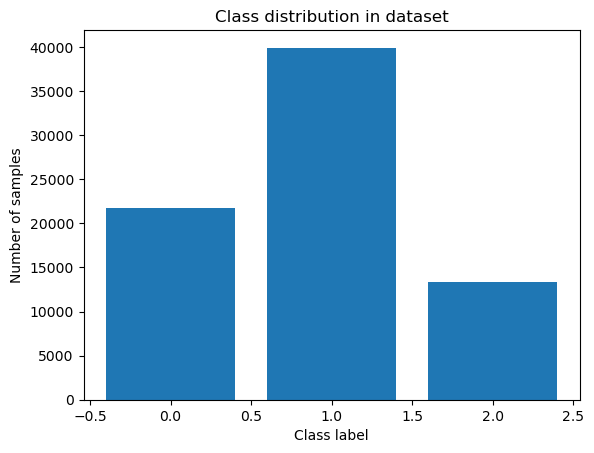

In [113]:
y2_train.count()
unique_labels, counts = np.unique(y2_train, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()